##Predicting Stock Prices Using Time Series Analysis

In [1]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
df = pd.read_csv("/content/ITC.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-28,244.300003,244.300003,239.500000,243.100006,208.427536,9315645.0
1,2016-11-01,242.800003,242.800003,239.149994,239.949997,205.726791,5517915.0
2,2016-11-02,237.000000,238.949997,235.100006,237.300003,203.454773,4687370.0
3,2016-11-03,237.050003,242.300003,236.000000,240.300003,206.026886,8868972.0
4,2016-11-04,251.500000,256.399994,247.050003,249.050003,213.528915,35263032.0


In [16]:
print(df.head())
print(df.shape)
print(df.columns)

         Date        Open        High  ...       Close   Adj Close      Volume
0  2016-10-28  244.300003  244.300003  ...  243.100006  208.427536   9315645.0
1  2016-11-01  242.800003  242.800003  ...  239.949997  205.726791   5517915.0
2  2016-11-02  237.000000  238.949997  ...  237.300003  203.454773   4687370.0
3  2016-11-03  237.050003  242.300003  ...  240.300003  206.026886   8868972.0
4  2016-11-04  251.500000  256.399994  ...  249.050003  213.528915  35263032.0

[5 rows x 7 columns]
(1235, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


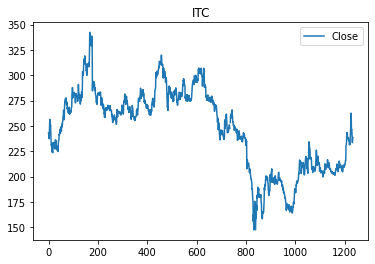

In [17]:
df[['Close']].plot()
plt.title("ITC")
plt.show()

Text(0.5, 1.0, 'ITC Cumulative Returns')

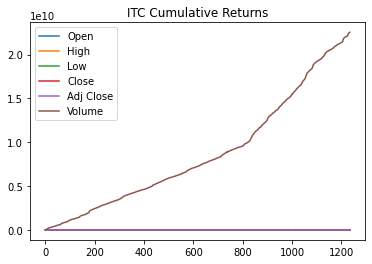

In [18]:
# Cumulative Return
dr = df.cumsum()
dr.plot()
plt.title('ITC Cumulative Returns')

Before starting working on Time Series prediction, I decided to analyse the autocorrelation plot of the “Open” feature with respect to a fixed lag of 5.Autocorrelation represents the degree of similarity between a given time series and a lagged version of itself over successive time intervals. Autocorrelation measures the relationship between a variable's current value and its past values.

The results shown in Figure confirmed the ARIMA would have been a good model to be applied to this type of data.

Text(0.5, 1.0, 'ITC Autocorrelation plot')

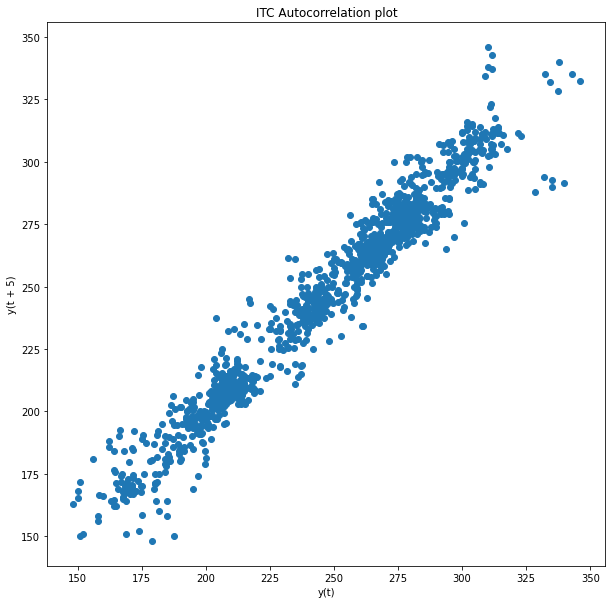

In [19]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('ITC Autocorrelation plot')

###ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. The method is suitable for univariate time series with trend and without seasonal components.

There are three important parameters in ARIMA:

p (past values used for forecasting the next value)

q (past forecast errors used to predict the future values)

d (order of differencing)


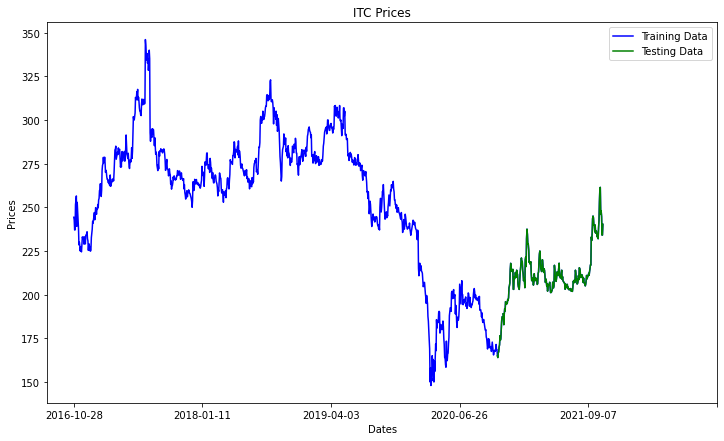

In [27]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('ITC Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1600, 300), df['Date'][0:1600:300])
plt.legend()

Order to evaluate the ARIMA model, I decided to use two different error functions: Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.


In [28]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [30]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

train_ar = np.nan_to_num(train_ar)
test_ar = np.nan_to_num(test_ar)

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 207.523
Symmetric mean absolute percentage error: 8.614


Finally, I decided to plot the training, test and predicted prices against time to visualize how did the model performed against the actual prices.

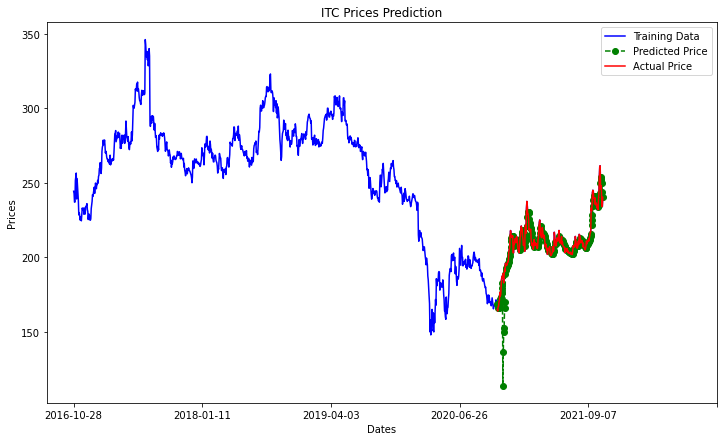

In [32]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('ITC Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1600, 300), df['Date'][0:1600:300])
plt.legend()

Below graph is prediction of test data and in the graph red stands for Actual Price and green stands for Predicted Price

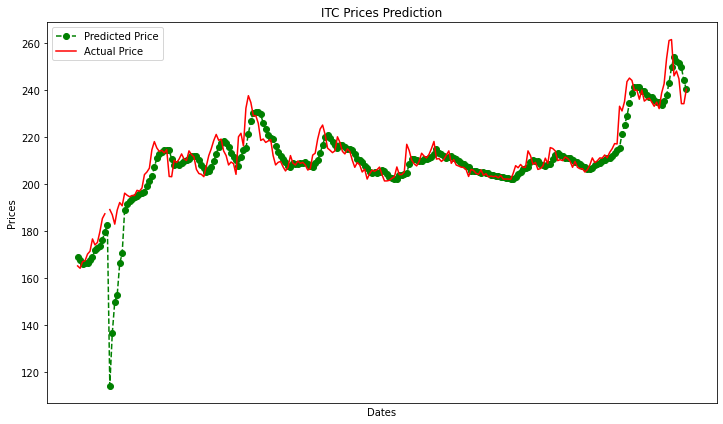

In [35]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,100, 90), df['Date'][1486:1000:90])
plt.title('ITC Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()